In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

/home/peter/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
unemployment = pd.read_csv('UNRATENSA.csv')

In [3]:
unemployment.head()

,DATE,UNRATENSA
0,1948-01-01,4.0
1,1948-02-01,4.7
2,1948-03-01,4.5
3,1948-04-01,4.0
4,1948-05-01,3.4


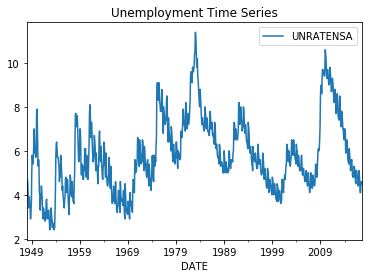

In [4]:
unemployment.index = pd.to_datetime(unemployment.DATE)
unemployment.plot()
plt.title('Unemployment Time Series')
plt.show()

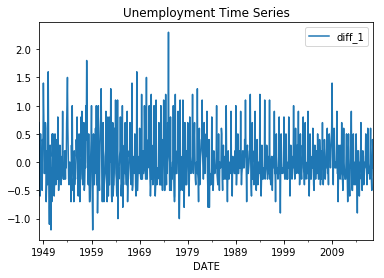

In [5]:
unemployment['diff_1'] = unemployment.UNRATENSA - unemployment.UNRATENSA.shift()
unemployment.plot(y='diff_1')
plt.title('Unemployment Time Series')
plt.show()

In [6]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(center=False,window=12).mean()
    rolstd = timeseries.rolling(center=False,window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

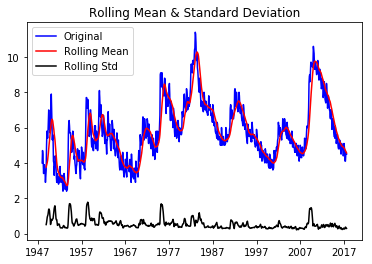

Results of Dickey-Fuller Test:
Test Statistic                  -2.655407
p-value                          0.082078
#Lags Used                      21.000000
Number of Observations Used    814.000000
Critical Value (10%)            -2.568664
Critical Value (1%)             -3.438409
Critical Value (5%)             -2.865097
dtype: float64


In [7]:
test_stationarity(unemployment.UNRATENSA)

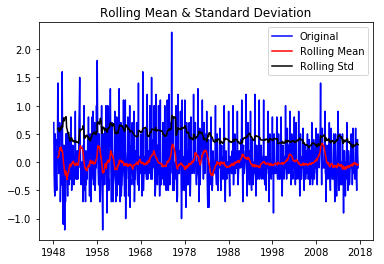

Results of Dickey-Fuller Test:
Test Statistic                -7.741372e+00
p-value                        1.059722e-11
#Lags Used                     2.000000e+01
Number of Observations Used    8.140000e+02
Critical Value (10%)          -2.568664e+00
Critical Value (1%)           -3.438409e+00
Critical Value (5%)           -2.865097e+00
dtype: float64


In [8]:
test_stationarity(unemployment.diff_1[1:])

In [16]:
model110 = ARIMA(unemployment.diff_1[1:], order=(1,1,0))
model_fit_110 = model110.fit()
print(model_fit_110.summary())
print('Residuals Description')
print(model_fit_110.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  834
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -733.141
Method:                       css-mle   S.D. of innovations              0.583
Date:                Wed, 27 Sep 2017   AIC                           1472.283
Time:                        15:55:38   BIC                           1486.461
Sample:                    03-01-1948   HQIC                          1477.719
                         - 08-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0006      0.015     -0.041      0.968      -0.029       0.028
ar.L1.D.diff_1    -0.3886      0.032    -12.173      0.000      -0.451      -0.326
                                    

In [17]:
model111 = ARIMA(unemployment.diff_1[1:], order=(1,1,1))
model_fit_111 = model111.fit()
print(model_fit_111.summary())
print('Residuals Description')
print(model_fit_111.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  834
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -549.063
Method:                       css-mle   S.D. of innovations              0.466
Date:                Wed, 27 Sep 2017   AIC                           1106.126
Time:                        15:55:56   BIC                           1125.031
Sample:                    03-01-1948   HQIC                          1113.375
                         - 08-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.724e-05   7.29e-05     -0.374      0.709      -0.000       0.000
ar.L1.D.diff_1     0.0838      0.035      2.424      0.016       0.016       0.151
ma.L1.D.diff_1    -1.0000      0.003

/home/peter/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [18]:
model_011 = ARIMA(unemployment.diff_1[1:], order=(0,1,1))
model_fit_011 = model_011.fit()
print(model_fit_011.summary())
print('Residuals Description')
print(model_fit_011.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  834
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -551.979
Method:                       css-mle   S.D. of innovations              0.467
Date:                Wed, 27 Sep 2017   AIC                           1109.958
Time:                        15:56:22   BIC                           1124.136
Sample:                    03-01-1948   HQIC                          1115.394
                         - 08-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.668e-05   6.71e-05     -0.398      0.691      -0.000       0.000
ma.L1.D.diff_1    -1.0000      0.003   -325.689      0.000      -1.006      -0.994
                                    

In [19]:
model_210 = ARIMA(unemployment.diff_1[1:], order=(2,1,0))
model_fit_210 = model_210.fit()
print(model_fit_210.summary())
print('Residuals Description')
print(model_fit_210.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  834
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -715.821
Method:                       css-mle   S.D. of innovations              0.571
Date:                Wed, 27 Sep 2017   AIC                           1439.643
Time:                        15:56:44   BIC                           1458.548
Sample:                    03-01-1948   HQIC                          1446.891
                         - 08-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0003      0.012     -0.029      0.977      -0.024       0.023
ar.L1.D.diff_1    -0.4674      0.034    -13.762      0.000      -0.534      -0.401
ar.L2.D.diff_1    -0.2019      0.034